### Import libraries

In [1]:
import numpy as np 
# import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cvxEDA
import datetime
from scipy import stats
from mpl_toolkits import mplot3d
import pylab as pl
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from scipy.stats import ks_2samp
from scipy.stats import ttest_1samp, wilcoxon, ttest_ind, mannwhitneyu
from sklearn.preprocessing import normalize
sns.set(color_codes = True)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Import data day 1

In [31]:
# Sampling frequency 4Hz ~= 0.25s
#6/27/2018
fl_eda_5 = pd.read_csv('../data/day_0/part2/EDA.csv' , header= None)
fl_eda_5.columns  = ['eda']
fl_eda_freq_5 = fl_eda_5.iloc[1].values
print(len(fl_eda_5))
print('freq: ', fl_eda_freq_5)
fl_eda_5.head(10)

3338
freq:  [4.]


,eda
0,1.530061e+09
1,4.000000e+00
2,0.000000e+00
3,1.793650e-01
4,2.088320e-01
5,2.331740e-01
6,2.126750e-01
7,2.139570e-01
8,2.113940e-01
9,2.152380e-01


In [32]:
print(len(fl_eda_5))
fl_eda_5.head(5)

3338


,eda
0,1.530061e+09
1,4.000000e+00
2,0.000000e+00
3,1.793650e-01
4,2.088320e-01


## Convert time

In [33]:
fl_init_time_5 = datetime.datetime.fromtimestamp(fl_eda_5.iloc[0]).strftime('%Y-%m-%d %H:%M:%S')
fl_init_time_5

'2018-06-26 17:50:23'

In [34]:
fl_eda_5 = fl_eda_5.iloc[3:]

In [35]:
fl_time_eda_5 = pd.date_range(start=fl_init_time_5, periods=len(fl_eda_5), 
                              freq=str(1/int(fl_eda_freq_5))+'S')
fl_time_eda_5

DatetimeIndex([       '2018-06-26 17:50:23', '2018-06-26 17:50:23.250000',
               '2018-06-26 17:50:23.500000', '2018-06-26 17:50:23.750000',
                      '2018-06-26 17:50:24', '2018-06-26 17:50:24.250000',
               '2018-06-26 17:50:24.500000', '2018-06-26 17:50:24.750000',
                      '2018-06-26 17:50:25', '2018-06-26 17:50:25.250000',
               ...
               '2018-06-26 18:04:14.250000', '2018-06-26 18:04:14.500000',
               '2018-06-26 18:04:14.750000',        '2018-06-26 18:04:15',
               '2018-06-26 18:04:15.250000', '2018-06-26 18:04:15.500000',
               '2018-06-26 18:04:15.750000',        '2018-06-26 18:04:16',
               '2018-06-26 18:04:16.250000', '2018-06-26 18:04:16.500000'],
              dtype='datetime64[ns]', length=3335, freq='250L')

In [36]:
fl_eda_5 = fl_eda_5.set_index(fl_time_eda_5, drop =True)
fl_eda_5 = fl_eda_5[:]
fl_eda_5 = fl_eda_5.dropna()
print(len(fl_eda_5))
fl_eda_5.head()

3335


,eda
2018-06-26 17:50:23.000,0.179365
2018-06-26 17:50:23.250,0.208832
2018-06-26 17:50:23.500,0.233174
2018-06-26 17:50:23.750,0.212675
2018-06-26 17:50:24.000,0.213957


# Remove outliers

In [37]:
fl_exp5 = fl_eda_5.copy()#example dataset of normally distributed data. 


fl_exp5 = fl_exp5[np.abs(fl_exp5.eda-fl_exp5.eda.mean())<=(3*fl_exp5.eda.std())] #keep only the ones that are within +3 to -3 standard deviations in the column 'Data'.
fl_exp5 = fl_exp5[~(np.abs(fl_exp5.eda-fl_exp5.eda.mean())>(3*fl_exp5.eda.std()))] #or if you prefer the other way around
fl_exp5 = fl_exp5.dropna()
print(len(fl_exp5))
fl_exp5.head()

3332


,eda
2018-06-26 17:50:23.000,0.179365
2018-06-26 17:50:23.250,0.208832
2018-06-26 17:50:23.500,0.233174
2018-06-26 17:50:23.750,0.212675
2018-06-26 17:50:24.000,0.213957


## Time marks

In [38]:
tags_5 = pd.read_csv('../data/marks/6.26.csv' , header= None)
tags_5 = tags_5.drop(tags_5.columns[2],axis=1)
tags_5.columns  =  ['tagged_time','presence']
tags_5.head()

,tagged_time,presence
0,2018-06-26 18:13:30.478,0
1,2018-06-26 18:07:30.340,0
2,2018-06-26 18:02:48.661,0
3,2018-06-26 18:02:31.328,0
4,2018-06-26 17:53:49.274,0


In [39]:
tags_5.tagged_time[0]

'2018-06-26 18:13:30.478'

## Separate Data

In [40]:
cat_5 = fl_exp5.loc['2018-06-26 17:51:30.000':'2018-06-26 18:01:55.000']
cat_5.head()

,eda
2018-06-26 17:51:30.000,0.265204
2018-06-26 17:51:30.250,0.265204
2018-06-26 17:51:30.500,0.269047
2018-06-26 17:51:30.750,0.266485
2018-06-26 17:51:31.000,0.265204


# Visualization

0.42922309384984014


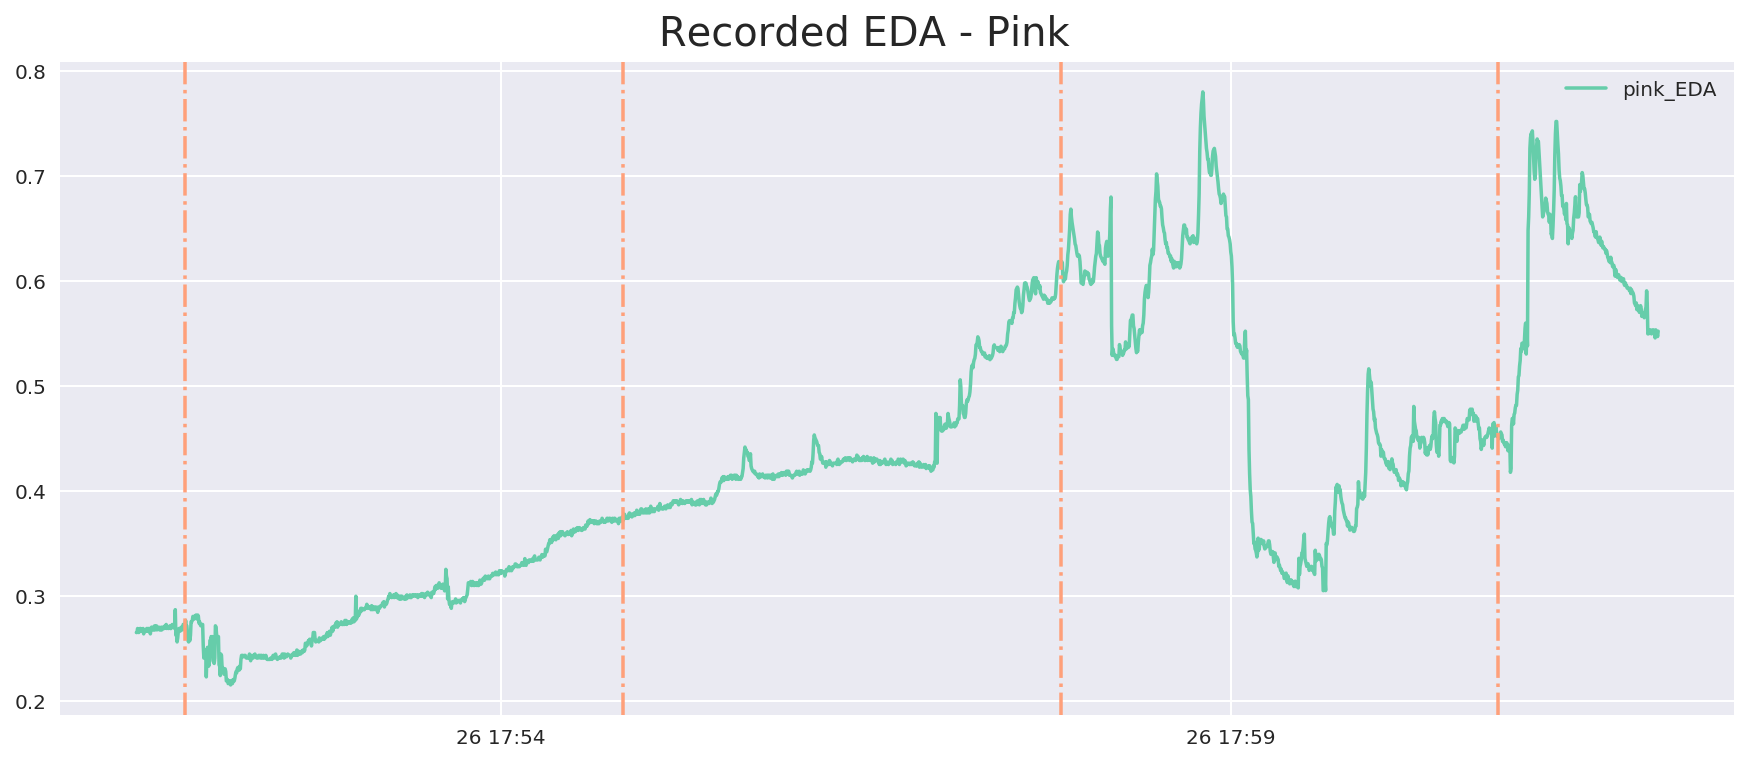

In [41]:
plt.figure(figsize=(15,6))
plt.plot(cat_5['eda'],color ='mediumaquamarine')
plt.figtext(.5,.9,'Recorded EDA - Pink ', fontsize=20, ha='center')
plt.legend(['pink_EDA'],loc=1,fontsize='medium')
plt.axvline(x = '2018-06-26 17:51:50.000',color = 'lightsalmon',linestyle='-.')
plt.axvline(x = '2018-06-26 17:54:50.000',color = 'lightsalmon',linestyle='-.')
plt.axvline(x = '2018-06-26 17:57:50.000',color = 'lightsalmon',linestyle='-.')
plt.axvline(x = '2018-06-26 18:00:50.000',color = 'lightsalmon',linestyle='-.')
# # plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')

eda_mean = np.mean(cat_5.eda)
print(eda_mean)
# plt.axhline(y = eda_mean, color = 'lightsalmon', linestyle = '--')
plt.savefig('pink-eda.png', transparent=True)
plt.show()


# cvxEDA

In [45]:
params = {'legend.fontsize': 'large',
          'figure.figsize': (10, 8),
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large'}
pl.rcParams.update(params)

In [46]:
y2 = np.asarray(cat_5.eda)
y2[:10]

array([0.265204, 0.265204, 0.269047, 0.266485, 0.265204, 0.267766,
       0.269047, 0.269047, 0.266485, 0.267766])

In [47]:
yn2 = (y2 - y2.mean()) / y2.std()
Fs = 4.
[r2, p2, t2, l2, d2, e2, obj2] = cvxEDA.cvxEDA(yn2, 1./Fs)

# pl.rcParams['figure.figsize'] = (30,20)
tm2 = pl.arange(1., len(y2)+1.) / Fs


     pcost       dcost       gap    pres   dres
 0: -1.2425e+03 -1.2333e+03  4e+03  6e+01  4e-01
 1: -1.2446e+03 -1.7469e+03  6e+02  8e+00  5e-02
 2: -1.2473e+03 -1.3421e+03  1e+02  1e+00  8e-03
 3: -1.2478e+03 -1.2716e+03  2e+01  2e-01  2e-03
 4: -1.2479e+03 -1.2541e+03  6e+00  3e-02  2e-04
 5: -1.2496e+03 -1.2511e+03  1e+00  4e-03  3e-05
 6: -1.2503e+03 -1.2508e+03  6e-01  1e-03  8e-06
 7: -1.2505e+03 -1.2507e+03  2e-01  9e-05  6e-07
 8: -1.2506e+03 -1.2507e+03  7e-02  2e-05  1e-07
 9: -1.2507e+03 -1.2507e+03  2e-02  6e-06  4e-08
10: -1.2507e+03 -1.2507e+03  5e-03  9e-07  6e-09
11: -1.2507e+03 -1.2507e+03  1e-03  1e-07  9e-10
12: -1.2507e+03 -1.2507e+03  3e-04  2e-08  2e-10
13: -1.2507e+03 -1.2507e+03  3e-05  1e-09  9e-12
14: -1.2507e+03 -1.2507e+03  2e-06  6e-11  4e-13
15: -1.2507e+03 -1.2507e+03  6e-08  1e-12  2e-14
Optimal solution found.


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/usr/local/lib/python3.5/dist-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


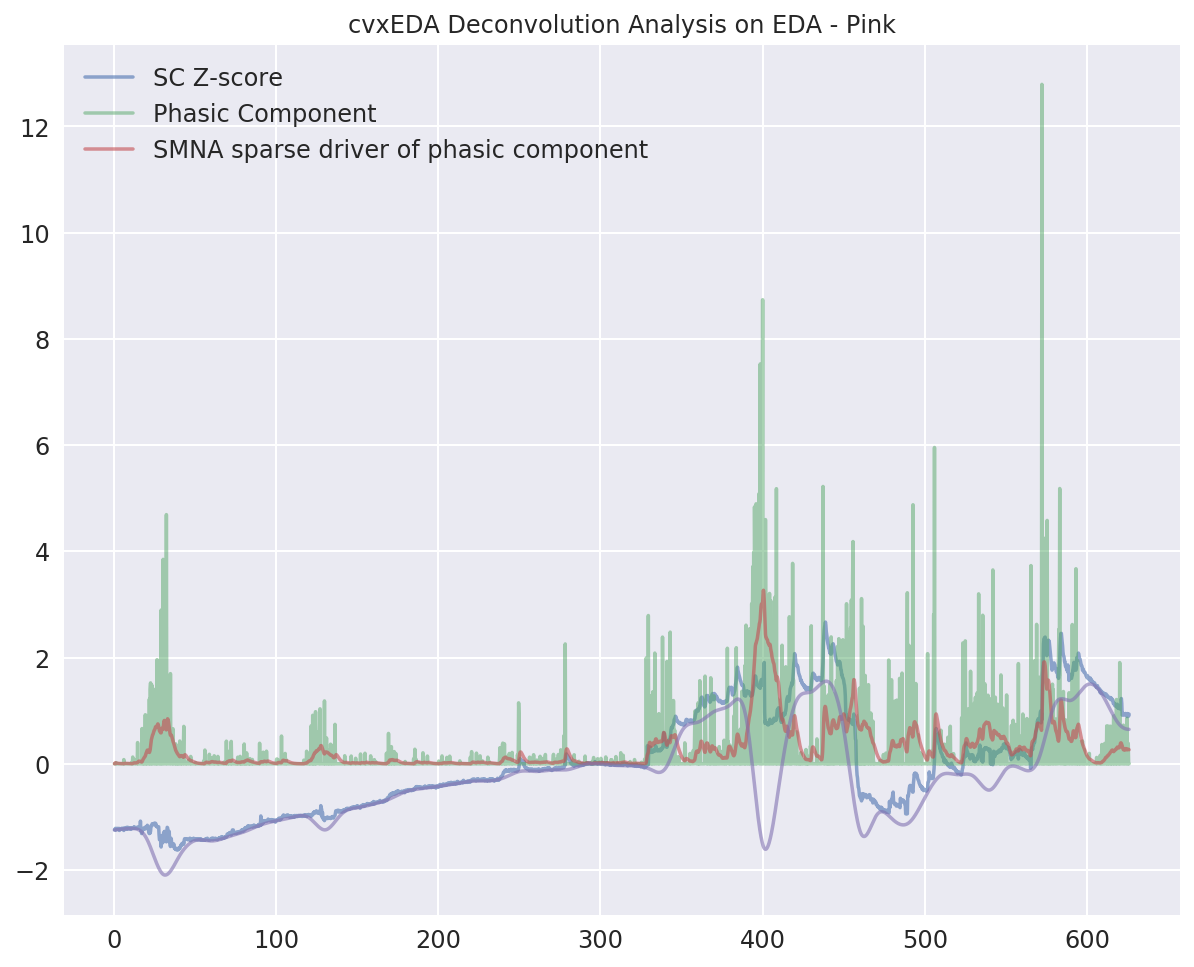

In [50]:
pl.hold(True)
pl.plot(tm2, yn2,alpha = 0.6)
pl.plot(tm2, p2,alpha = 0.5)
pl.plot(tm2, r2,alpha = 0.6)

pl.plot(tm2, t2,alpha = 0.6)


pl.title('cvxEDA Deconvolution Analysis on EDA - Pink')
pl.legend(['SC Z-score','Phasic Component','SMNA sparse driver of phasic component',
           ])
plt.savefig('pink-cvxEDA.png', transparent=True)
plt.show()

## Logarithm 

In [41]:
fl_exp2['eda'] = np.log(fl_exp2['eda'])
fl_exp2.head(5)

,eda
2018-06-27 17:30:03.000,-0.181527
2018-06-27 17:30:03.250,0.166735
2018-06-27 17:30:03.500,0.482208
2018-06-27 17:30:03.750,0.740791
2018-06-27 17:30:04.000,0.789750


In [ ]:
log_eda_mean = np.mean(fl_exp2.eda)
print(log_eda_mean)
plt.figure(figsize=(15,6))
plt.plot(fl_exp2['eda'],color ='limegreen')
plt.figtext(.5,.9,'Stress response to cold showermodulated by social presence experiment- EDA ', fontsize=20, ha='center')
plt.legend(['EDA'],loc=1,fontsize='medium')
plt.axhline(y = log_eda_mean,color = 'salmon',linestyle='--')
plt.axvline(x = tags_2.tagged_time[0],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[1],color = 'hotpink',linestyle='--')
plt.axvline(x = tags_2.tagged_time[3],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[4],color = 'c',linestyle='--')
plt.axvline(x = tags_2.tagged_time[5],color = 'c',linestyle='--')
plt.show()